<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER5%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 회귀 소개**

- 일반 선형 회귀: 예측값과 실젯값의 **RSS(Residual Sum of Squares)**를 최소화할 수 있도록 회귀 계수를 최적화하며 규제를 적용하지 않은 모델입니다.

- **릿지(Ridge)** 회귀: 선형 회귀에 **L2 규제**를 추가한 회귀 모델입니다. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만듭니다.

- **라쏘(Lasso)** 회귀: 선형 회귀에 **L1 규제(=피처 선택 기능)**를 추가한 회귀 모델입니다. L1 규제는 예측 형향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않도록 할 수 있습니다.

- **엘라스틱넷(ElasticNet)**: L2, L1 규제를 결합한 회귀 모델입니다. 피처가 많은 데이터 세트에서 적용됩니다. L1 규제로 피처 개수를 줄이면서 L2 규제로 계수 값 크기를 조정합니다.

- **로지스틱 회귀(Logistic Regression)**: 회귀 모델 아닌 분류용 선형 모델입니다. 이진 분류뿐만 아니라 희소 영역의 분류(텍스트 분류 등) 같은 영역에서 좋은 예측 성능을 발휘합니다.

# **2. 단순 선형 회귀를 통한 회귀 이해**

실젯값과 회귀 모델의 차이에 따른 오류 값을 남은 오류 또는 **잔차**라고 부릅니다. 최적의 회귀 모델은 잔차 합이 최소가 되는 모델이며 잔차 합이 최소가 될 수 있는 최적의 회귀 계수를 가진 것을 의미합니다.

잔차는 양수나 음수 모두 될 수 있습니다. 보통 잔차를 계산할 때는 절댓값을 취해서 더하는 방식(**MAE, Mean Absolute Error**), 오류 값의 제곱을 구해서 더하는 방식(**RSS, Residual Sum of Squares**)을 사용합니다. 일반적으로는 RSS 방식을 취합니다. 회귀에서 RSS는 비용(Cost)이고 회귀 계수로 구성되는 RSS를 **비용 함수(손실 함수, Loss Function)**라고 부릅니다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값인 잔차(오류 값)을 지속해서 감소시키고 더 감소하지 않는 최소 잔차를 구하는 것입니다.

수학 수식은 생략하겠습니다.

# **3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

**경사 하강법**은 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식입니다. 점진적이고 반복적으로 계산하면서 회귀 계수 값을 업데이트하고 궁극적으로는 오류 값이 최소가 되는 회귀 계수를 도출하는 방식입니다. 딥러닝의 기반인 신경망에서도 경사 하강법을 통해 학습합니다.

경사 하강법은 반복적으로 비용 함수의 반환 값(예측값과 실젯값의 차이)이 작아지는 방향성을 가지고 W 파라미터(회귀 계수)를 계속 조정합니다. 최초 오류 값을 100으로 가정한다면 두 번째 오류 값은 90, 세 번째 오류 값은 80처럼 지속해서 오류를 감소시키는 방향으로 계속 업데이트합니다. 오류 값이 더 감소할 수 없으면 최소 비용으로 판단하고 최적 파라미터로 반환합니다.

참고로 실전에서는 대부분 대용량 데이터를 다루므로 속도가 빠른 **확률적 경사 하강법(Stochastic Gradient Descent)** 또는 **미니 배치 확률적 경사 하강법(Mini-Batch Stochastic Gradient Descent)**을 사용합니다. 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용하여 w가 업데이트되는 값을 계산하므로 일반 경사 하강법보다 속도가 빠릅니다. 

수학적 설명과 수식, 코드 구현은 생략하겠습니다. 자세한 내용은 서적을 참고하시기 바랍니다.



# **4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

선형 모델 중 규제가 적용되지 않은 `LinearRegression` 클래스를 사용하여 보스턴 주택 가격 예측 회귀를 구현해 보겠습니다.

## **4.1. LinearRegression 클래스 - Ordinary Least Squares**

`LinearRegression` 클래스는 예측값과 실젯값의 RSS를 최소화하여 **OLS(Ordinary Least Squares)** 추정 방식으로 구현한 클래스입니다. OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받습니다. 피처 간 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해집니다. 이 현상을 **다중 공선성(multi-collinearity)** 문제라고 합니다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용합니다. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행할 수도 있습니다.

## **4.2. 회귀 평가 지표**

회귀 평가 지표는 실젯값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심입니다. 실젯값과 예측값 차이를 더하면 양수와 음수가 섞여서 오류가 상쇄되므로(+2와 -2를 더하면 0) 정확한 지표가 될 수가 없기 때문에 아래 지표들을 활용합니다. 수식은 생략하겠습니다.

- **MAE(Mean Absolute Error)**: 실젯값과 예측값의 차이를 절댓값으로 변환하여 평균합니다. `metrics` 모듈의 `mean_absolute_error()` 메서드이며, Scoring 함수(`cross_val_score` 메서드와 `GridSearchCV` 클래스)의 `scoring` 파라미터 인자는 `neg_mean_absolute_error`입니다. 

- **MSE(Mean Squared Error)**: 실젯값과 예측값의 차이를 제곱하여 평균합니다. `metrics` 모듈의 `mean_squared_error()` 메서드이며, `scoring` 파라미터 인자는 `neg_mean_squared_error`입니다. 

- **MSLE(Mean Squared Log Error)**: MSE에 로그를 적용합니다. `metrics` 모듈의 `mean_squared_log_error()` 메서드이며, `scoring` 파라미터 인자는 `neg_mean_squared_log_error`입니다. 

- **RMSE(Root Mean Squared Error)**: MSE에 루트를 씌웁니다. MSE는 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있기 때문입니다. 사이킷런이 제공하지 않는 평가 지표이므로 MSE에 루트를 씌워서 계산하는 함수를 정의해야 합니다.

- **RMSLE(Root Mean Squared Log Error)**: RMSL에 로그를 적용합니다. 

- **R$^2$**: 분산 기반으로 예측 성능을 평가합니다. 실젯값의 분산 대비 예측값의 분산 비율을 지표로 합니다. 1에 가까울수록 예측 정확도가 높습니다. `metrics` 모듈의 `r2_score()` 메서드이며, `scoring` 파라미터 인자는 `r2`입니다.

참고로 `scoring` 파라미터 인자의 `neg_`는 Negative(음수)를 가진다는 것을 의미합니다. MAE는 절댓값이므로 음수일 수 없습니다. `neg_mean_absolute_error`를 적용하여 음수값을 변환하는 이유는 Scoring 함수가 `score` 값이 클수록 좋은 평가 결과로 자동적으로 평가하기 때문입니다. 특히 `GridSearchCV`는 가장 좋은 평가 값을 가지는 하이퍼 파라미터로 분류기를 학습까지 자동으로 시킬 수 있습니다. 그러나 실젯값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표는 값이 커지면 오히려 나쁜 모델이라는 의미이므로 Scoring 함수에 반영하려면 보정 작업이 필요합니다. 따라서 -1을 원래 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 합니다. 즉, `neg_mean_absolute_error`는 $-1 \times$ `mean_absolute_error()`를 의미합니다.


## **4.3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

보스턴 주택 가격을 예측해 보겠습니다.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


피처에 대한 설명을 확인하겠습니다.

In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

결측치를 확인하겠습니다.

In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


결측치는 없습니다. 

각 피처가 회귀 결과에 미치는 영향의 정도를 시각화하여 확인해 보겠습니다.

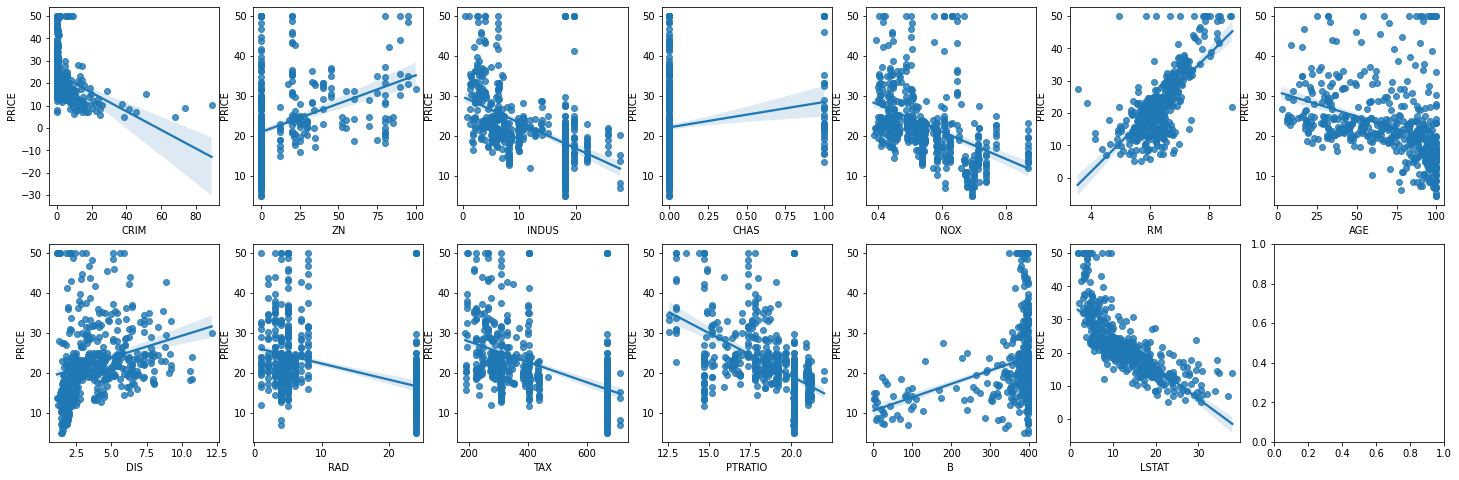

In [ ]:
fig, axs = plt.subplots(figsize=(25, 8), ncols=7, nrows=2)
lm_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
for i, feature in enumerate(lm_features):
    row = int(i /7)
    col = i % 7
    # `regplot()` 메서드를 사용하여 산점도와 선형 회귀 직선을 그립니다.
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

'RM'과 'LSTAT'가 'PRICE'에 미치는 영향이 가장 커보입니다. 'RM'은 방 개수를 의미합니다. 양 방향의 선형성(Positive Linearity)이 가장 크며 방 개수가 많을수록 가격은 증가합니다. 반면 'LSTAT'는 하위 계층 비율을 의미하며 비율이 높을수록 가격은 하락합니다.

`LinearRegression` 클래스로 회귀 모델을 생성하고 MSE, RMSE, R2 값을 측정하겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE: {:.3f}, RMSE: {:.3f}'.format(mse, rmse))
print('Variance score: {:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


절편(intercept)과 회귀 계수(coefficients)를 확인하겠습니다.

In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164755
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


피처별 회귀 계수를 내림차순으로 출력해 보겠습니다.

In [ ]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

폴드 세트 5개에서 교차 검증으로 MSE와 RMSE를 측정해 보겠습니다. MSE 값이 낮을수록 좋은 회귀 모델입니다. 

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RNSE: {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RNSE: 5.829


# **5. 다항 회귀와 과(대)적합/과소적합 이해**

## **5.1. 다항 회귀 이해**

다항식에 대한 설명은 생략하겠습니다. 예시로 `PolynomialFeatures` 클래스를 사용하여 피처를 다항식 피처로 변환하겠습니다. `degree` 파라미터에 지정한 인자에 따라 n차 다항식 피처로 변환합니다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)
print()

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]

변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항 계수를 이용하여 3차 다항 회귀 함수식을 `PolynomialFeatures` 클래스와 `LinearRegression` 클래스를 사용하여 유도해 보겠습니다. 이를 위해 3차 다항 회귀 함수를 임의로 선언하고 이의 회귀 계수를 예측하겠습니다. 3차 다항 회귀의 결정 함수식은 $y = 1 + 2x_1 + 3x^2_1 + 4x^3_1$로 설정하겠습니다. 이 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환할 것입니다.

In [ ]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

In [ ]:
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)
print()

y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]

삼차 다항식 결정값:
 [  5 125]


1차 단항식 계수를 3차 다항식 계수로 변환하고 이를 선형 회귀에 적용하여 다항 회귀로 구현하겠습니다.

In [ ]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


파이프라인으로 피처 변환과 선형 회귀를 한 번에 적용하여 다항 회귀를 구현하겠습니다.

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)
model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## **5.2. 다항 회귀를 이용한 과소적합 및 과적합 이해**

다항 회귀 차수를 높일수록 학습 데이터만 지나치게 학습하여 테스트 데이터에 대한 예측 정확도는 떨어집니다. 과대적합 현상이 일어나는 것입니다.

사이킷런 홈페이지에서 [다항 회귀를 이용한 과소적합과 과대적합 예시](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)를 가져왔습니다. 아래 코드는 링크에서 가져온 코드이며 원래 데이터 세트는 피처 X와 타깃 y가 잡음이 포함된 다항식의 코사인 그래프 관계를 갖도록 만들어 줍니다. 그리고 이에 기반하여 다항 회귀의 차수를 변화시키면서 회귀 예측 곡선과 예측 정확도를 비교합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 반환합니다.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 ~ 1까지 임의의 값 30개를 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y는 코사인 기반의 `true_fun()`에서 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

차수를 1, 4, 15로 변경하면서 예측 결과를 비교하겠습니다. 다항식 차수별로 학습을 수행하고 `cross_val_score()` 메서드로 MSE 값을 구하여 차수별 예측 성능을 평가하겠습니다. 그리고 0 ~ 1까지 균일하게 구성된 테스트용 데이터 세트를 이용하여 차수별 회귀 예측 곡선을 그리겠습니다.

Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.043208749872320706입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다.
Degree 15 MSE는 180526263.3177066입니다.



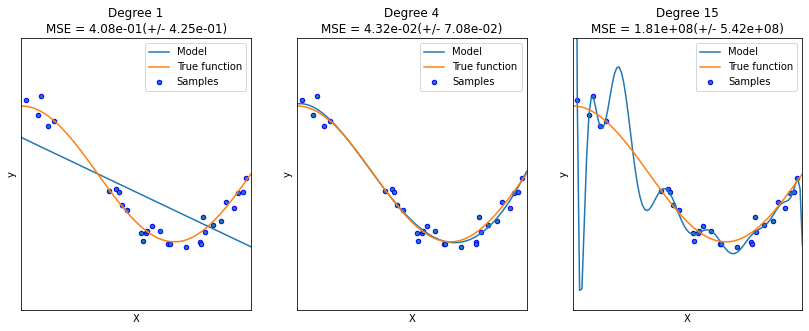

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀 차수를 변화시킵니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 차수별로 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(
        pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10
    )
    # 파이프라인을 구성하는 세부 객체에 접근하여 회귀 계수를 추출합니다.
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('Degree {} 회귀 계수는 {}입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {} MSE는 {}입니다.'.format(degrees[i], -1 * np.mean(scores)))
    print()

    # 0 ~ 1까지 테스트 데이터 세트를 100개만큼 나누고
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그립니다.
    X_test = np.linspace(0, 1, 100)
    #  예측값 곡선을 그립니다.
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #  실젯값 곡선을 그립니다.
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

주황선은 데이터 세트의 코사인 곡선이고, 파란선은 다항 회귀 예측 곡선입니다. 첫 번째 모델은 예측에 실패한 모델이며 과소적합 상태입니다. 두 번째 모델은 매우 훌륭하게 예측한 모델이며 낮은 MSE 값 또한 가장 뛰어난 예측 성능을 나타냅니다. 세 번째 모델은 잡음 값까지 지나치게 반영하면서 학습 데이터만 정확하게 예측하고 테스트 데이터는 예측하지 못하는 과대적합 상태입니다.

## **5.3. 편향-분산 트레이드오프(bias-variance trade off)**

**편향-분산 트레이드오프**는 반드시 극복해야 할 문제입니다. 위의 차수 1 모델은 매우 단순화된 모델이므로 한 방향성을 가지고 **고편향(High Bias)성**을 띈다고 표현합니다. 차수 15 모델은 매우 복잡화된 모델이므로 지나치게 높은 변동성을 가지고 **고분산(High Variance)성**을 띈다고 표현합니다. 편향과 분산의 높고 낮음을 아래 그림으로 표현할 수 있습니다.

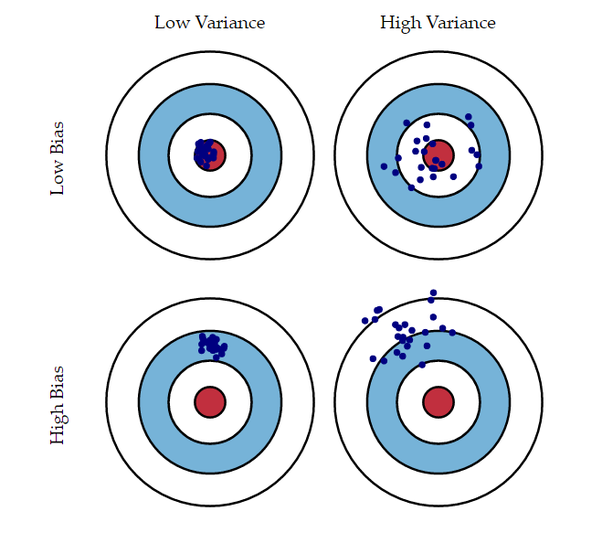

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽은 낮아집니다. 편향이 높으면 분산이 낮아져서 과소적합이 되고, 편향이 낮으면 분산이 높아져서 과대적합이 됩니다. 편향과 분산이 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축해야 합니다.

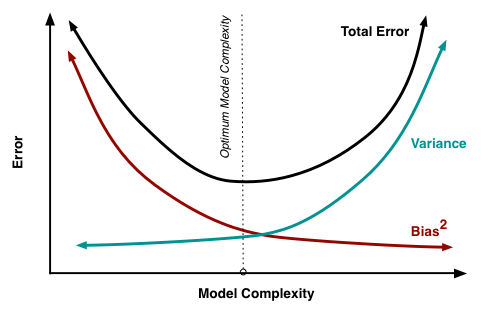


# **6. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**

## **6.1. 규제 선형 모델의 개요**

회귀 모델은 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 합니다. 이전까지 선형 모델의 비용 함수는 RSS를 최소화하는(실젯값과 예측값의 차이를 최소화하는) 것만 고려하면서 학습 데이터에 지나치게 맞추게 되고 회귀 계수는 쉽게 커졌습니다. 이는 변동성을 심하게 하여 테스트 데이터 세트에 대한 예측 성능을 떨어뜨리는 원인입니다. 따라서 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않게 하는 방법이 균형을 이뤄야 합니다. 비용 함수의 목표에 대한 자세한 설명은 서적을 참고하시기 바랍니다. 여기서는 몇 가지만 정리하겠습니다. 

alpha 값을 0부터 증가시키면 회귀 계수 크기를 감소시킬 수 있습니다. 비용 함수에 이 alpha 값으로 패널티를 부여하여 회귀 계수 크기를 감소시켜 과대적합을 개선하는 방식을 **규제(Regulation)**라고 합니다. **L2** 규제를 적용한 **릿지(Ridge) 회귀**와 **L1** 규제를 적용한 **라쏘(Lasso) 회귀**가 있습니다. L2 규제와 L1 규제를 함께 적용한 **엘라스틱넷(Elastic Net) 회귀**도 있습니다. 어떤 규제 선형 회귀가 적합한지는 상황에 따라 다릅니다.

## **6.2. 릿지 회귀**

보스턴 주택 가격을 `Ridge` 클래스로 다시 예측하고 예측 성능을 평가해 보겠습니다. 먼저 `alpha`를 `10`으로 지정해 보겠습니다.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                                 scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


위에서 규제가 없던 선형회귀 모델의 RMSE 점수인 5.829보다 낮은 점수를 얻었습니다. 규제를 적용했을 때 더 뛰어난 예측 성능을 보이는 것입니다.

다음으로는 alpha 값을 바꿔가며 살펴보겠습니다.

In [ ]:
alphas = [0, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                                 scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha={}일 때 5 folds의 평균 RMSE: {:.3f}'.format(alpha, avg_rmse))

alpha=0일 때 5 folds의 평균 RMSE: 5.829
alpha=0.1일 때 5 folds의 평균 RMSE: 5.788
alpha=1일 때 5 folds의 평균 RMSE: 5.653
alpha=10일 때 5 folds의 평균 RMSE: 5.518
alpha=100일 때 5 folds의 평균 RMSE: 5.330
alpha=1000일 때 5 folds의 평균 RMSE: 5.598


`alpha=100`일 때 가장 예측 성능이 좋습니다.

`alpha` 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화해 보겠습니다.


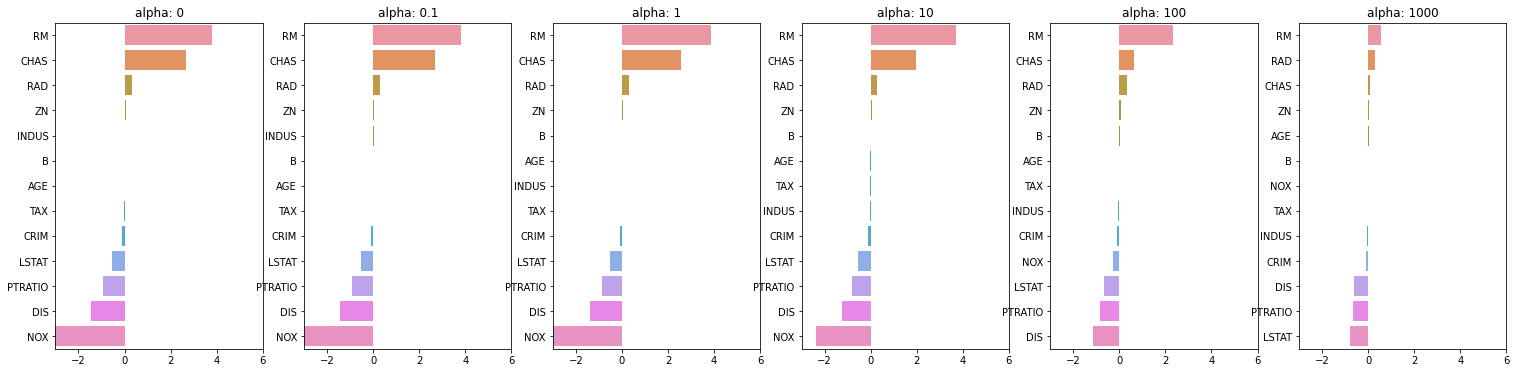

In [ ]:
fig, axs = plt.subplots(figsize=(26, 6), nrows=1, ncols=6)
# 회귀 계수를 저장할 데이터프레임을 생성합니다.
coeff_df = pd.DataFrame()

# `pos` 객체는 axis의 위치 지정 용도입니다.
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # 회귀 계수를 데이터프레임에 추가하기 위해 시리즈로 변환합니다.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    # 열명을 지정합니다.
    colname = 'alpha: ' + str(alpha)
    # 변환한 시리즈를 새로운 열에 추가합니다.
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100, 1000]
sort_column = 'alpha: ' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100,alpha: 1000
RM,3.809865,3.818233,3.854000,3.702272,2.334536,0.568555
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335,0.101449
RAD,0.306049,0.303515,0.290142,0.279596,0.315358,0.310743
ZN,0.046420,0.046572,0.047443,0.049579,0.054496,0.054378
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826,-0.036336
B,0.009312,0.009368,0.009673,0.010037,0.009393,0.007990
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212,0.030573
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856,-0.016602
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202,-0.090768
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764,-0.763721


`alpha` 값이 증가하면 회귀 계수가 점점 작아집니다. 다만 0으로 만들지는 않습니다. 라쏘 회귀가 회귀 계수를 0으로 만드는 것과 큰 차이점입니다.

## **6.3. 라쏘 회귀**

L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거합니다. 이런 특성으로 적절한 피처만 회귀에 포함시킵니다.

위 과정을 라쏘와 엘라스틱넷을 동시에 수행하기 위해 직접 함수를 선언하겠습니다.

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('###', model_name, '###')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            # `alpha` 값의 변화만 살필 용도이므로 `l1_ratio` 파라미터 값을 `0.7`로 고정합니다.
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(
            model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse_scores = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha={}일 때 5 폴드 세트의 평균 RMSE: {:.3f}'.format(param, avg_rmse_scores))

        model.fit(X_data_n, y_target_n)

        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha: ' + str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

선언한 함수로 라쏘 모델의 RMSE를 출력해 보겠습니다.

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

### Lasso ###
alpha=0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha=0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha=0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha=1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha=3일 때 5 폴드 세트의 평균 RMSE: 6.189


`alpha=0.07`일 때 가장 성능이 좋습니다. 릿지보다는 약간 떨어지지만 선형 회귀 모델보다는 좋습니다.

피처별 회귀 계수를 확인하겠습니다.

In [ ]:
sort_column = 'alpha: ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


0이 된 회귀 계수도 있습니다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택 효과를 얻습니다.

## **6.4. 엘라스틱넷 회귀**

**엘라스틱넷** 회귀는 L2 규제와 L1 규제를 결합한 회귀입니다. 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우 이들 중에서 중요 피처만을 고르고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하므로 alpha 값에 따라 회귀 계수가 급격히 변동할 수 있습니다. 이를 완화하기 위해 L2 규제를 결합한 것입니다. 다만 수행시간이 단일 규제보다 오래 걸립니다.

`ElasticNet` 클래스의 주요 파라미터는 `alpha`, `l1_ratio`입니다. 자세한 설명은 서적을 참고하시기 바랍니다. `l1_ratio`가 `0`이면 L2 규제이고 `1`이면 L1 규제와 동일하다는 점만 알고 넘어가겠습니다.

RMSE와 회귀 계수를 출력해 보겠습니다.

In [ ]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                       X_data_n=X_data, y_target_n=y_target)

### ElasticNet ###
alpha=0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha=0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha=0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha=1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha=3일 때 5 폴드 세트의 평균 RMSE: 6.068


`alpha=0.5`일 때 가장 성능이 좋습니다.

피처별 회귀 계수를 확인해 보겠습니다.

In [ ]:
sort_column = 'alpha: ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


라쏘보다 0이 된 값이 비교적 적습니다. 

## **6.5. 선형 회귀 모델을 위한 데이터 변환**

선형 회귀 모델은 피처값과 타깃값의 정규 분포 형태를 선호합니다. 만약 타깃값이 왜곡된 형태의 분포도일 경우 예측 성능은 크게 떨어집니다. 피처값 역시 결정값보다는 덜하지만 왜곡된 형태의 분포도는 예측 성능을 떨어뜨립니다. 이러한 이유로 선형 회귀 모델을 적용하기 전에 데이터 스케일링, 정규화 작업(이하 전처리)을 수행해야 합니다. 물론 전처리 작업을 수행한다 하여 무조건 예측 성능이 제고되는 것은 아닙니다.

피처 데이터 세트와 타깃 데이터 세트에 전처리 작업을 수행하는 방법은 다릅니다. 먼저 피처 데이터 세트에 적용하는 전처리 작업에 대해 설명하겠습니다. 총 3가지 방법이 있습니다. 

첫 번째 방법으로는 `StandardScaler` 클래스로 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 `MinMaxScaler` 클래스로 최솟값 0, 최댓값 1인 값으로 변환합니다. 예측 성능을 크게 제고하기 어려울 수 있습니다.

두 번째 방법으로는(첫 번째 방법으로 예측 성능 제고에 실패하였을 경우) 전처리를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환합니다. 다만 피처 개수가 많으면 다항 변환으로 생성되는 피처 개수가 크게 많아져서 과대적합이 일어날 가능성이 높아집니다.

세 번째 방법으로는 원래 값에 log 함수를 적용하여 정규 분포에 가까운 형태로 변환합니다. 이를 로그 변환(Log Transfomation)이라고 합니다. 기실 첫 번째와 두 번째 방법보다 더 많이 사용하는 방법입니다.

다음으로는 타깃값에 적용하는 전처리 작업에 대해 설명하겠습니다. 결정값을 정규 분포나 다른 정규값으로 변환하면 원본 타깃값으로 복구하기 어려울 수도 있습니다. 따라서 왜곡된 분포도 형태에서는 로그 변환을 적용하며 가장 효과가 좋습니다.

보스턴 주택 가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓값 최솟값 정규화, 로그 변환을 차례로 적용하고 RMSE로 예측 성능을 측정해 보겠습니다. 이 과정을 로직으로 새 함수를 선언하겠습니다.

In [ ]:
#  `method`는 전처리 방법, `p_degree`는 다항식 특성입니다.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        # `log()` 메서드를 적용하면 언더 플로우가 발생하기 쉬우므로
        # `1 + log()`를 적용합니다. 이를 구현한 `log1p()` 메서드를 포함시킵니다.
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    # 다항식 차수가 None이 아니면(2차 이상이라면) 다항 변환을 수행합니다.
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).\
        fit_transform(scaled_data)
    return scaled_data

선언한 함수를 호출하여 RMSE 값을 확인하겠습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

alphas = [0.1, 1, 10, 100, 1000]

# 다항식 차수는 최대 2까지만 지정합니다.
scale_methods = [
                (None, None), ('Standard', None), ('Standard', 2),
                ('MinMax', None), ('MinMax', 2), ('Log', None)
]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print('## 변환 유형: {}, Polynomial Degree: {}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target,
                        verbose=False, return_coeff=False)
    print()

## 변환 유형: None, Polynomial Degree: None
alpha=0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha=1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha=10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha=100일 때 5 폴드 세트의 평균 RMSE: 5.330
alpha=1000일 때 5 폴드 세트의 평균 RMSE: 5.598

## 변환 유형: Standard, Polynomial Degree: None
alpha=0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha=1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha=10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha=100일 때 5 폴드 세트의 평균 RMSE: 5.421
alpha=1000일 때 5 폴드 세트의 평균 RMSE: 6.714

## 변환 유형: Standard, Polynomial Degree: 2
alpha=0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha=1일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha=10일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha=100일 때 5 폴드 세트의 평균 RMSE: 4.634
alpha=1000일 때 5 폴드 세트의 평균 RMSE: 6.055

## 변환 유형: MinMax, Polynomial Degree: None
alpha=0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha=1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha=10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha=100일 때 5 폴드 세트의 평균 RMSE: 7.635
alpha=1000일 때 5 폴드 세트의 평균 RMSE: 9.121

## 변환 유형: MinMax, Polynomial Degree: 2
alpha=0.1일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha=1일 때 5 폴드 세트의 평

다항 변환은 피처 개수가 많으면 적용하기 어렵습니다. 맨 아래의 로그 변환은 다항 변환을 수행하지 않고도 4점대로 성능 제고를 이뤘습니다. 일반적으로 데이터 분포가 왜곡된 경우 로그 변환을 수행하는 것이 좋습니다.

# **7. 로지스틱 회귀**

**로지스틱 회귀**는 선형 회귀 방식을 분류에 적용한 분류용 알고리즘입니다. 회귀의 선형 비선형 여부는 독립변수가 아닌 가중치 변수가 선형인지 아닌지를 따릅니다. 선형 함수의 회귀 최적선을 찾지 않고 **시그모이드(Sigmoid) 함수** 최적선을 찾아서 이 함수의 반환 값을 확률로 간주합니다. 이 확률에 따라 분류를 결정합니다. 시그모이드 함수는 x 값이 양수와 음수로 커지거나 작아져도 y 값은 항상 0 ~ 1 사잇값을 반환합니다. x 값이 커지면 1에 근사하고 작아지면 0에 근사합니다. x가 0이면 0.5입니다. 이외 자세한 설명은 본서를 참고하시기 바랍니다. 

위스콘신 유방암 데이터 세트에 로지스틱 회귀를 적용해 보겠습니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

cancer = load_breast_cancer()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                    test_size=0.3, random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


그리드 서치로 하이퍼 파라미터 최적화를 수행해 보겠습니다. 

In [ ]:
from sklearn.model_selection import GridSearchCV

# `penalty`는 규제 유형, `C`는 규제 강도입니다.
# `C`는 alpha 값의 역수이며 값이 작을수록 규제 강도가 큽니다.
params = {
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 5, 10]
}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터: {}, 최적 평균 정확도: {:.3f}'.format(
    grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도: 0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.94555834        nan 0.97364708        nan 0.97539218        nan
 0.97011974        nan 0.96661097        nan]
  category=UserWarning,


참고로 로지스틱 회귀는 가볍고 빠르며 이진 분류 예측 성능도 뛰어납니다. 이진 분류의 기본 모델로 로지스틱 회귀를 사용하는 경우가 많습니다. 희소한 데이터 세트 분류에도 뛰어나므로 텍스트 분류에서도 자주 사용합니다.

# **8. 회귀 트리**

회귀 트리는 분류 트리와 달리 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있습니다. 분류 트리는 특정 클래스 레이블을 결정하지만 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구하여 예측값으로 도출합니다. 상세한 내용은 본서를 참고하시기 바랍니다. 

참고로 하이퍼 파라미터는 분류 트리와 거의 같습니다. 

보스턴 주택 가격 예측을 수행해 보겠습니다. 먼저 랜덤 포레스트를 사용합니다.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target,
                                 scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5교차 검증의 평균 RMSE: {:.3f}'.format(avg_rmse))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 평균 RMSE: 4.423


결정 트리, GBM, XGBoost, LightGBM의 Regressor를 구현한 클래스를 모두 적용해 보겠습니다. 한꺼번에 적용할 수 있도록 함수를 하나 정의하겠습니다.

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target,
                                     scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##', model.__class__.__name__, '##')
    print('5교차 검증의 평균 RMSE: {:.3f}'.format(avg_rmse))
    print()

정의한 함수를 적용하겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

## DecisionTreeRegressor ##
5교차 검증의 평균 RMSE: 5.978

## RandomForestRegressor ##
5교차 검증의 평균 RMSE: 4.423

## GradientBoostingRegressor ##
5교차 검증의 평균 RMSE: 4.269

[13:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
## XGBRegressor ##
5교차 검증의 평균 RMSE: 4.089

## LGBMRegressor ##
5교차 검증의 평균 RMSE: 4.646



회귀 트리 Regressor 클래스류는 선형 회귀와 다른 방식이므로 회귀 계수 속성인 `coef_`가 없습니다. 대신 `feature_importances_` 속성으로 피처별 중요도를 확인할 수 있습니다. 피처별 중요도를 시각화해 보겠습니다.

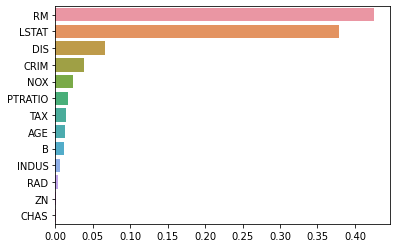

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
plt.show()

2차원 평면상에 회귀 예측선을 쉽게 표현하기 위해 'PRICE' 피처와 가장 밀접한 양의 상관관계를 가지는 'RM' 피처만 사용하여 선형 회귀와 결정 트리 회귀로 예측 회귀선을 시각화해 보겠습니다.

(100, 2)


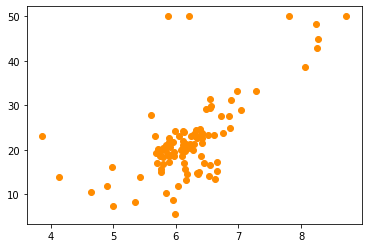

In [ ]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
# 샘플 100개만 추출합니다.
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
plt.show()

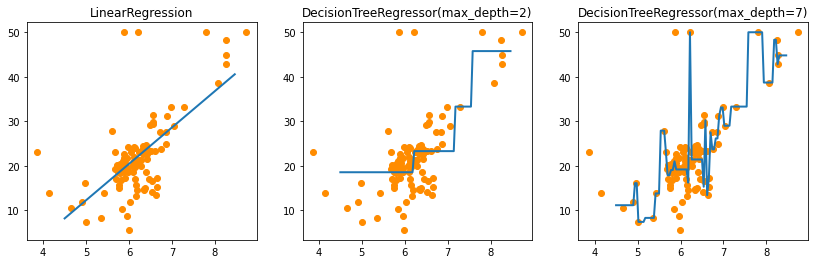

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 생성합니다.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# X축에 독립변수인 'RM' 피처, y축에 종속변수인 'PRICE' 피처를 삼습니다. 
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('LinearRegression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('DecisionTreeRegressor(max_depth=2)')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth=2', linewidth=2)

ax3.set_title('DecisionTreeRegressor(max_depth=7)')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth=7', linewidth=2)
plt.show()

선형 회귀와 달리 회귀 트리는 분할되는 데이터 지점에 따라 브랜치를 생성하면서 계단식으로 회귀선을 형성합니다. 다만 깊이가 7인 경우에는 이상치까지 학습하면서 회귀선이 복잡해졌고 이는 과대적합된 모델을 나타냅니다.

# **9. 회귀 실습 - 자전거 대여 수요 예측**

## **9.1. 데이터 클렌징 및 가공**

캐글의 [자전거 대여 수요 데이터 세트](https://www.kaggle.com/c/bike-sharing-demand/data) 를 사용하여 선형 회귀와 트리 기반 회귀를 적용해 보겠습니다. 2011. 1. ~ 2012. 12. 기간 동안 각종 피처와 자전거 대여 횟수가 기록되어 있습니다. 마지막 피처인 'count'가 자전거 대여 횟수입니다. 문제에서 요구한 성능 평가 방법은 RMSLE입니다. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('/content/gdrive/MyDrive/bike-sharing-demand/train.csv')
print(bike_df.head())
print()
print(bike_df.shape)
print()
print(bike_df.info())

Mounted at /content/gdrive/
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

(10886, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      ----------

'datetime' 피처 외에 모두 숫자형입니다. 'datetime' 피처를 `datetime` 타입으로 변경하고 연, 월, 일, 시간 피처를 추가하겠습니다.

In [ ]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

print(bike_df.head())
print()
print(bike_df.shape)
print()
print(bike_df.info())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4  

(10886, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 

'datetime' 피처는 삭제하겠습니다. 아울러 'casual' 피처와 'registered' 피처를 더한 총합이 'count' 피처이므로 두 피처도 함께 삭제하겠습니다.

In [ ]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

RMSLE를 수행하는 성능 평가 함수를 선언하겠습니다. 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    msle = mean_squared_log_error(y, pred)
    rmsle = np.sqrt(mse)
    return rmsle

다만 RMSLE를 구현한 `rmsle()` 함수를 정의할 때 주의할 사항이 있습니다. `log()` 메서드나 `mean_squared_log_error()` 메서드를 사용하면 데이터 값 크기에 따라 오버플로나 언더플로 오류가 발생할 수 있습니다. 이러한 문제를 방지하기 위해 `log1p()` 메서드를 사용하여 1 + log() 값을 구현해야 합니다. 이렇게 변환된 값은 넘파이의 `expm1()` 메서드를 사용하여 다시 원래 스케일로 복원할 수 있습니다.

In [ ]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

추가로 MSE와 RMSE도 평가할 수 있도록 함수를 추가로 정의하고 최종 평가 함수에 로직을 통합하겠습니다.

In [ ]:
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {:.3f}, RMSE: {:.3f}, MAE: {:.3f}'.format(rmsle_val, rmse_val, mae_val))

## **9.2. 로그 변환, 피처 인코딩과 모델 학습/예측/평가**

먼저 선형 회귀를 적용하여 회귀 예측을 수행해 보겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


실제 타깃값을 고려하면 예측 오류로서는 비교적 큰 값입니다. 실젯값과 예측값이 어느 정도 차이가 나는지 오류 값이 가장 큰 순으로 5개만 확인해 보겠습니다.

In [ ]:
def get_top_error_data(y_test, pred, n_tops=5):
    # 실제 'count' 피처로 구성된 데이터프레임을 생성합니다.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    # 예측값으로 구성된 데이터를 추가합니다.
    result_df['predicted_count'] = np.round(pred)
    # 실젯값과 예측값의 차를 데이터로 추가합니다.
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    print(result_df.sort_values('diff', ascending=False)[:n_tops])

In [ ]:
get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


예측 오류 정도가 큽니다. 이런 상황에서는 먼저 타깃값이 왜곡된 형태로 분포하고 있는지 여부를 확인해야 합니다. 정규 분포가 아니라면 회귀 예측 성능이 저하되는 경우가 발생합니다. 히스토그램으로 확인해 보겠습니다.

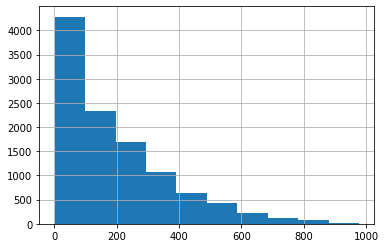

In [ ]:
y_target.hist()
plt.show()

왜곡된 정도가 심합니다. 가장 일반적인 방법은 타깃값에 로그 변환을 적용하는 것입니다. 로그 변환을 적용한 타깃값을 히스토그램으로 다시 확인해 보겠습니다.

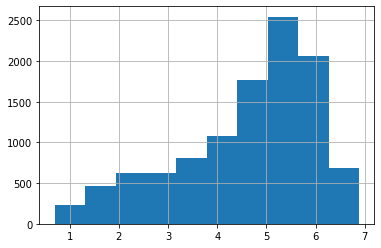

In [ ]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()
plt.show()

정규 분포는 아니지만 왜곡 정도가 많이 완화됐습니다.

로그 변환을 적용한 타깃값을 토대로 다시 회귀 예측을 수행해 보겠습니다.

In [ ]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log,
                                                    test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 로그 형태로 변환된 타깃값과 예측값을 다시 원래 스케일로 변환합니다.
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


RMSLE 오류는 줄고 RMSE와 MAE는 늘었습니다.

각 피처의 회귀 계수를 시각화하여 원인을 파악하겠습니다.


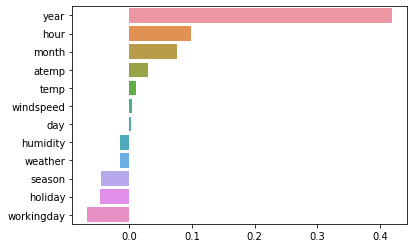

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()

'year'피처가 압도적으로 높습니다. 'year' 피처는 2011년과 2012년으로 구성되어 있고, 이 피처가 자전거 대여 횟수에 큰 영향을 준다는 것은 유의미하지 않다고 판단할 수 있습니다. 이 피처의 회귀 계수가 큰 이유는 2011, 2012라는 카테고리형 피처이면서 숫자형 피처이고 매우 큰 숫자이기 때문입니다. 숫자형 카테고리 값을 선형 회귀에 사용하면 회귀 계수를 연산할 때 이 값에 크게 영향을 받을 수 있습니다. 그런즉 피처에 원-핫 인코딩을 적용할 필요가 있습니다.

'year' 피처를 포함하여 카테고리형인 여러 피처에 원-핫 인코딩을 적용하고 학습 데이터 세트와 테스트 데이터 세트로 분할하겠습니다.

In [ ]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day',
                                                     'hour', 'holiday', 'workingday',
                                                     'season', 'weather'])
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

선형 회귀, 릿지, 라쏘를 학습하고 예측 성능 평가 수치를 한꺼번에 출력하는 함수를 선언하겠습니다.

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('##', model.__class__.__name__, '##')
    evaluate_regr(y_test, pred)
    print()

함수를 적용하겠습니다.

In [ ]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

## LinearRegression ##
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382

## Ridge ##
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893

## Lasso ##
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803



예측 성능이 전반적으로 향상됐습니다.

회귀 계수가 높은 피처를 다시 시각화해 보겠습니다.

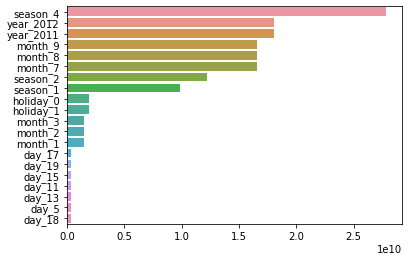

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
# 피처를 상위 20개까지만 시각화합니다.
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()

본서와 전혀 다른 결과가 도출되었습니다. 상식적으로 자전거 이용과 밀접한 연관이 없는 피처의 회귀 계수가 높습니다. 원인을 파악하는 대로 업데이트하겠습니다.

이번에는 회귀 트리를 이용하여 회귀 예측을 수행하겠습니다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

models = [rf_reg, gbm_reg, xgb_reg, lgbm_reg]

for model in models:
    # XGBoost의 경우 데이터프레임을 입력하면 오류가 발생할 수 있기 때문에
    # `X_train.values`, `X_test.values` ... `y_test.values` 형식으로 입력하여
    # `ndarray` 타입으로 변환하고 인자로 전달합니다.
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

## RandomForestRegressor ##
RMSLE: 0.354, RMSE: 50.284, MAE: 31.134

## GradientBoostingRegressor ##
RMSLE: 0.330, RMSE: 53.326, MAE: 32.737

[14:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
## XGBRegressor ##
RMSLE: 0.345, RMSE: 58.245, MAE: 35.768

## LGBMRegressor ##
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029



선형 회귀 모델보다 전반적으로 예측 성능이 개선됐습니다. 다만 데이터 세트 유형에 따라 결과는 달라질 수 있으므로 항상 회귀 트리가 선형 회귀보다 더 나은 성능을 가진다고 볼 수는 없습니다.

# **10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법**



---

휴식 중

---



## **10.1. 데이터 사전 처리(preprocessing)**

## **10.2. 선형 회귀 모델 학습/예측/평가**

## **10.3. 회귀 트리 모델 학습/예측/평가**

## **10.4. 회귀 모델의 예측 결과 혼합을 통한 최종 예측**

## **10.5. 스태킹 앙상블 모델을 통한 회귀 예측**

# **11. 정리**